In [1]:
# !pip import yfinance

In [2]:
# For data manipulation
import numpy as np
import pandas as pd

# To fetch financial data
import yfinance as yf

# For visualisation
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import seaborn as sns

from datetime import datetime

C:\Users\Ananya\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Ananya\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Ananya\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
# default variables
start_date = '2004-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')
# currency pair can be input by user
currency_symbol = input()

 GBPUSD


In [15]:
forex_data = yf.download(currency_symbol + "=X", start_date, end_date, auto_adjust=True)
forex_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2004-01-01,1.788813,1.788813,1.781705,1.785204,0
2004-01-02,1.785587,1.795010,1.779201,1.793690,0
2004-01-05,1.795493,1.810315,1.795107,1.807207,0
2004-01-06,1.807403,1.827786,1.805510,1.821295,0
2004-01-07,1.820897,1.825584,1.812711,1.817785,0
...,...,...,...,...,...
2022-08-29,1.169180,1.174260,1.164958,1.169454,0
2022-08-30,1.172127,1.175807,1.162304,1.172251,0
2022-08-31,1.166086,1.169454,1.160025,1.165977,0


In [16]:
# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

In [17]:
# dropping volume column, since in case of forex no volume is provided by any broker
forex_data.drop("Volume", axis=1, inplace=True)

In [18]:
forex_data.shape

(4855, 4)

In [19]:
 forex_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4855 entries, 2004-01-01 to 2022-09-02
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4855 non-null   float64
 1   High    4855 non-null   float64
 2   Low     4855 non-null   float64
 3   Close   4855 non-null   float64
dtypes: float64(4)
memory usage: 189.6 KB


In [20]:
forex_data.isna().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [21]:
forex_data.dropna(inplace=True)

In [ ]:
forex_data.to_csv("GBPUSD.csv")

In [22]:
forex_data.describe()

,Open,High,Low,Close
count,4855.000000,4855.000000,4855.000000,4855.000000
mean,1.561200,1.567033,1.554911,1.561225
std,0.231404,0.232108,0.231199,0.231422
min,1.149637,1.158856,0.637389,1.149439
25%,1.343021,1.347863,1.337766,1.343102
50%,1.556662,1.562695,1.550604,1.556905
75%,1.734244,1.740402,1.726296,1.734109
max,2.108415,2.115820,2.098812,2.108192


<AxesSubplot:>

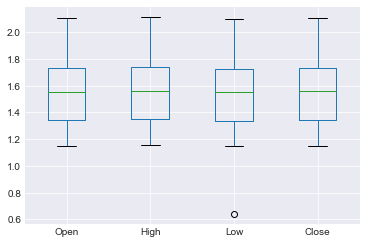

In [23]:
forex_data.boxplot()

In [24]:
forex_data['month'] = forex_data.index.month
forex_data['year'] = forex_data.index.year
forex_data['month_year'] = forex_data.index.to_period('M')

In [25]:
df_groupby_month_year = forex_data.groupby('month_year')[["Close", "Open", "High", "Low"]].mean().reset_index()
df_groupby_month_year

,month_year,Close,Open,High,Low
0,2004-01,1.821047,1.819335,1.830357,1.806933
1,2004-02,1.869247,1.867386,1.877183,1.857899
2,2004-03,1.828007,1.830189,1.839122,1.817310
3,2004-04,1.804626,1.807011,1.814858,1.795847
4,2004-05,1.789379,1.786892,1.796160,1.779462
...,...,...,...,...,...
220,2022-05,1.245177,1.245248,1.250240,1.239602
221,2022-06,1.233631,1.233650,1.238530,1.225737
222,2022-07,1.200004,1.200040,1.204940,1.192667
223,2022-08,1.199391,1.199448,1.204729,1.193410


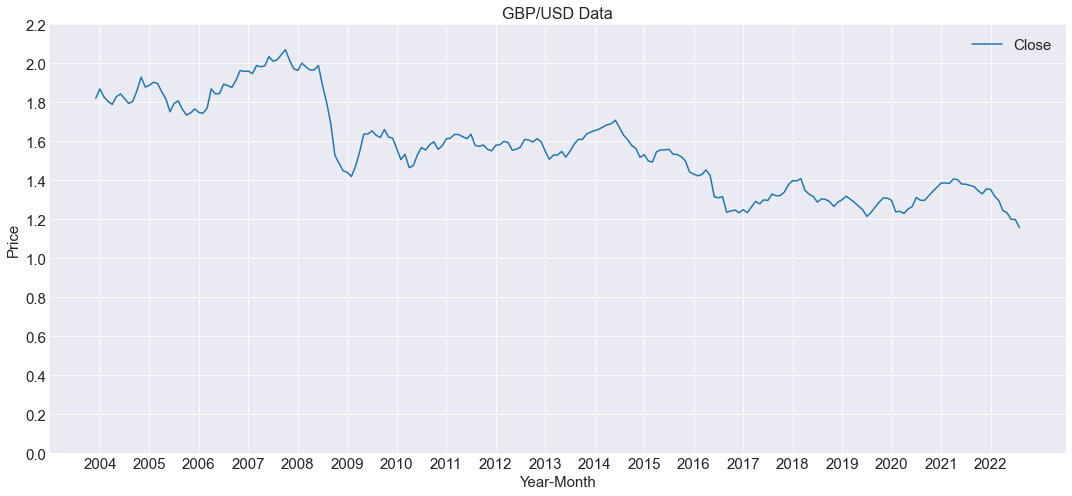

In [27]:
# Plot the close price
plt.figure(figsize=(15, 7))
df_groupby_month_year['Close'].plot()
x_ticks = list(range(1, 229, 12))
y_ticks = list(np.arange(0, 2.4, 0.2))
x_ticklabels = [x for x in range(2004, 2023)]

# Set the title and axis label
plt.title('GBP/USD Data', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(ticks=x_ticks, labels=x_ticklabels, fontsize=15)
plt.yticks(y_ticks, fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Show the plot
plt.tight_layout()
plt.show()

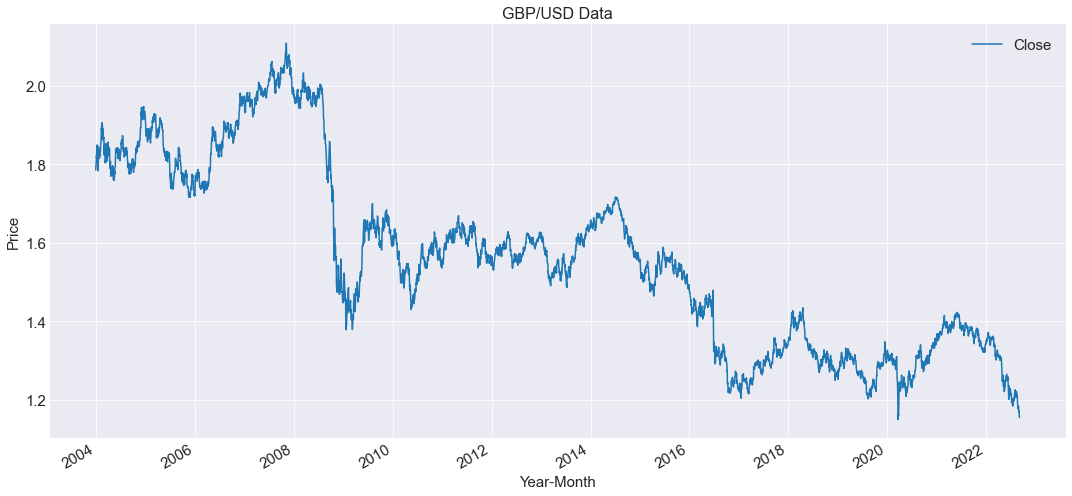

In [28]:
# Plot the close price
plt.figure(figsize=(15, 7))
forex_data['Close'].plot()

# Set the title and axis label
plt.title('GBP/USD Data', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.annotations import Title
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral10

from datetime import datetime

df_groupby_month_year['month_year'] = df_groupby_month_year['month_year'].astype(str)
df_groupby_month_year['month_year'] = pd.to_datetime(df_groupby_month_year['month_year'])

source = ColumnDataSource(df_groupby_month_year)

output_notebook()

p = figure(plot_height = 500, \
           plot_width = 900, \
           x_axis_type = 'datetime')

p.line(x='month_year', y='Close', legend_label = 'Close_mean', source=source, color=Spectral10[1], line_width=4)
p.line(x='month_year', y='Open', legend_label = 'Open_mean', source=source, color=Spectral10[2], line_width=4)
p.line(x='month_year', y='High', legend_label = 'High_mean', source=source, color=Spectral10[3], line_width=4)
p.line(x='month_year', y='Low', legend_label = 'Low_mean', source=source, color=Spectral10[4], line_width=4)

p.xaxis[0].ticker.desired_num_ticks = 20

p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Exchange Rate'

t = Title()
t.text = 'Exchange Rate: GBP/USD'
p.title = t

hover = HoverTool(tooltips = [
                  ('Close_mean','@Close'),\
                  ('Open_mean', '@Open'),\
                  ('High_mean', '@High'),\
                  ('Low_mean', '@Low')])
p.add_tools(hover)
show(p)

Loading BokehJS ...